In [11]:
import pandas as pd 
import numpy as np
from pandas.plotting import table
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import MultipleLocator
import os
from datetime import date 
import math

# configurations
# this script is applicatble only for ring-molecules
NUM_CARBON = 6

# Read data from file 
date_computed = str(date.today())

In [4]:
# --------------- Graph showing correlation between initial structure vs. structure at twist -------------# 
# Read data from file 
date_computed = str(date.today())
file_path_1 = os.path.join(".", "output", "CHD",date_computed + "_IC_CHD_initial" + ".csv")
file_path_2 = os.path.join(".", "output", "CHD",date_computed + "_IC_CHD_hop" + ".csv")
initial_data = pd.read_csv(file_path_1)
hop_data = pd.read_csv(file_path_2)

# ----------------------- Merge & filter ----------------------- #
dih_merge = pd.merge(initial_data.iloc[:,:], \
                         hop_data.iloc[:,:], \
                         suffixes=('_initial','_hop'), on='TRAJ')
# dih_merge

In [5]:
dih_merge.columns

Index(['TRAJ', 'C1-C2_initial', 'C2-C3_initial', 'C3-C4_initial',
       'C4-C5_initial', 'C5-C6_initial', 'C6-C1_initial', 'C6-C1-C2_initial',
       'C1-C2-C3_initial', 'C2-C3-C4_initial', 'C3-C4-C5_initial',
       'C4-C5-C6_initial', 'C5-C6-C1_initial', 'dih H7-C1-C2-H8_initial',
       'dih H9-C3-C4-H10_initial', 'dih C4-C5-C6-C1_initial', 'C1-C2_hop',
       'C2-C3_hop', 'C3-C4_hop', 'C4-C5_hop', 'C5-C6_hop', 'C6-C1_hop',
       'C6-C1-C2_hop', 'C1-C2-C3_hop', 'C2-C3-C4_hop', 'C3-C4-C5_hop',
       'C4-C5-C6_hop', 'C5-C6-C1_hop', 'dih H7-C1-C2-H8_hop',
       'dih H9-C3-C4-H10_hop', 'dih C4-C5-C6-C1_hop'],
      dtype='object')

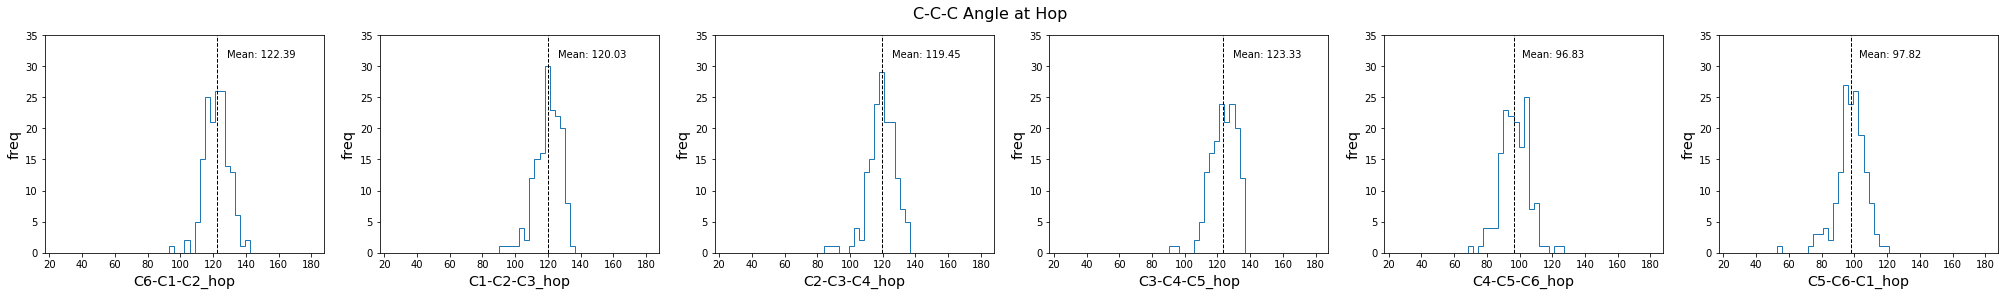

In [40]:
# plot histrograms - 3 items to change:
'''
1. dataframe indexes 
2. plot name
3. range(min,max)
4. output name
'''

C_C_df = dih_merge.iloc[:,22:-3]
fig, axes = plt.subplots(ncols=len(C_C_df.columns), figsize=(35,4))
fig.suptitle('C-C-C Angle at Hop', size=16) 

for col, axe in zip(C_C_df.columns, axes):
        x = C_C_df[col]
        axe.hist(x, bins=50, range=(25,180), histtype='step', label=col)
        axe.set_xlabel(col, fontsize='x-large')
        axe.set_ylabel('freq', fontsize='x-large')
        axe.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axe.set_ybound(lower=0,upper=35)
        ymin,ymax=axe.get_ylim()
        axe.text(x.mean()*1.05, ymax*0.9,'Mean: {:.2f}'.format(x.mean()))
        
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals","CHD", "histograms", date_computed + "_C_C_C_angle_IC_value" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visuals' & 'histograms' folder if not existed yet
plt.savefig(output_path)

In [31]:
# ------------------- Compute mean & stdv for dihedrals ----------------- #
split_index = math.ceil(len(dih_merge.columns)/2)
mean_initial = dih_merge.iloc[:,1:split_index].mean(axis=0).round(decimals=1).rename('avg_i').to_frame() 
mean_hop = dih_merge.iloc[:,split_index:].mean(axis=0).round(decimals=1).rename('avg_h').to_frame() 
std_initial = dih_merge.iloc[:,1:split_index].std(axis=0).round(decimals=3).rename('std_i').to_frame()
std_hop = dih_merge.iloc[:,split_index:].std(axis=0).round(decimals=3).rename('std_h').to_frame() 

# ------------- set axis ----------------
mean_initial.set_axis(hop_data.columns[1:], axis=0, inplace=True)
mean_hop.set_axis(hop_data.columns[1:], axis=0, inplace=True)
std_initial.set_axis(hop_data.columns[1:], axis=0, inplace=True)
std_hop.set_axis(hop_data.columns[1:], axis=0, inplace=True)

# Merge
compare_mean = pd.concat([mean_initial, std_initial, mean_hop, std_hop], axis=1, sort=False).reset_index()                                           # axis{0/’index’, 1/’columns’},
compare_mean.index = range(len(compare_mean))

compare_mean
# #------------------------- Output to file ----------------------#
# fig = plt.figure()
# display(compare_mean[:])
# output_path = os.path.join(".", "visuals", "CHD", "initial_vs_hop", date_computed + "_initial_vs_hop_average" + ".png")
# os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
# fig.savefig(output_path, bbox_inches='tight', dpi=600)

,index,avg_i,std_i,avg_h,std_h
0,C1-C2,1.4,0.039,1.4,0.056
1,C2-C3,1.5,0.044,1.4,0.056
2,C3-C4,1.4,0.036,1.4,0.055
3,C4-C5,1.5,0.050,1.4,0.055
4,C5-C6,1.5,0.053,2.2,0.315
5,C6-C1,1.5,0.049,1.4,0.061
6,C6-C1-C2,119.5,3.956,122.4,7.415
7,C1-C2-C3,120.7,3.387,120.0,7.652
8,C2-C3-C4,120.7,3.336,119.4,8.201
9,C3-C4-C5,119.6,3.825,123.3,7.733


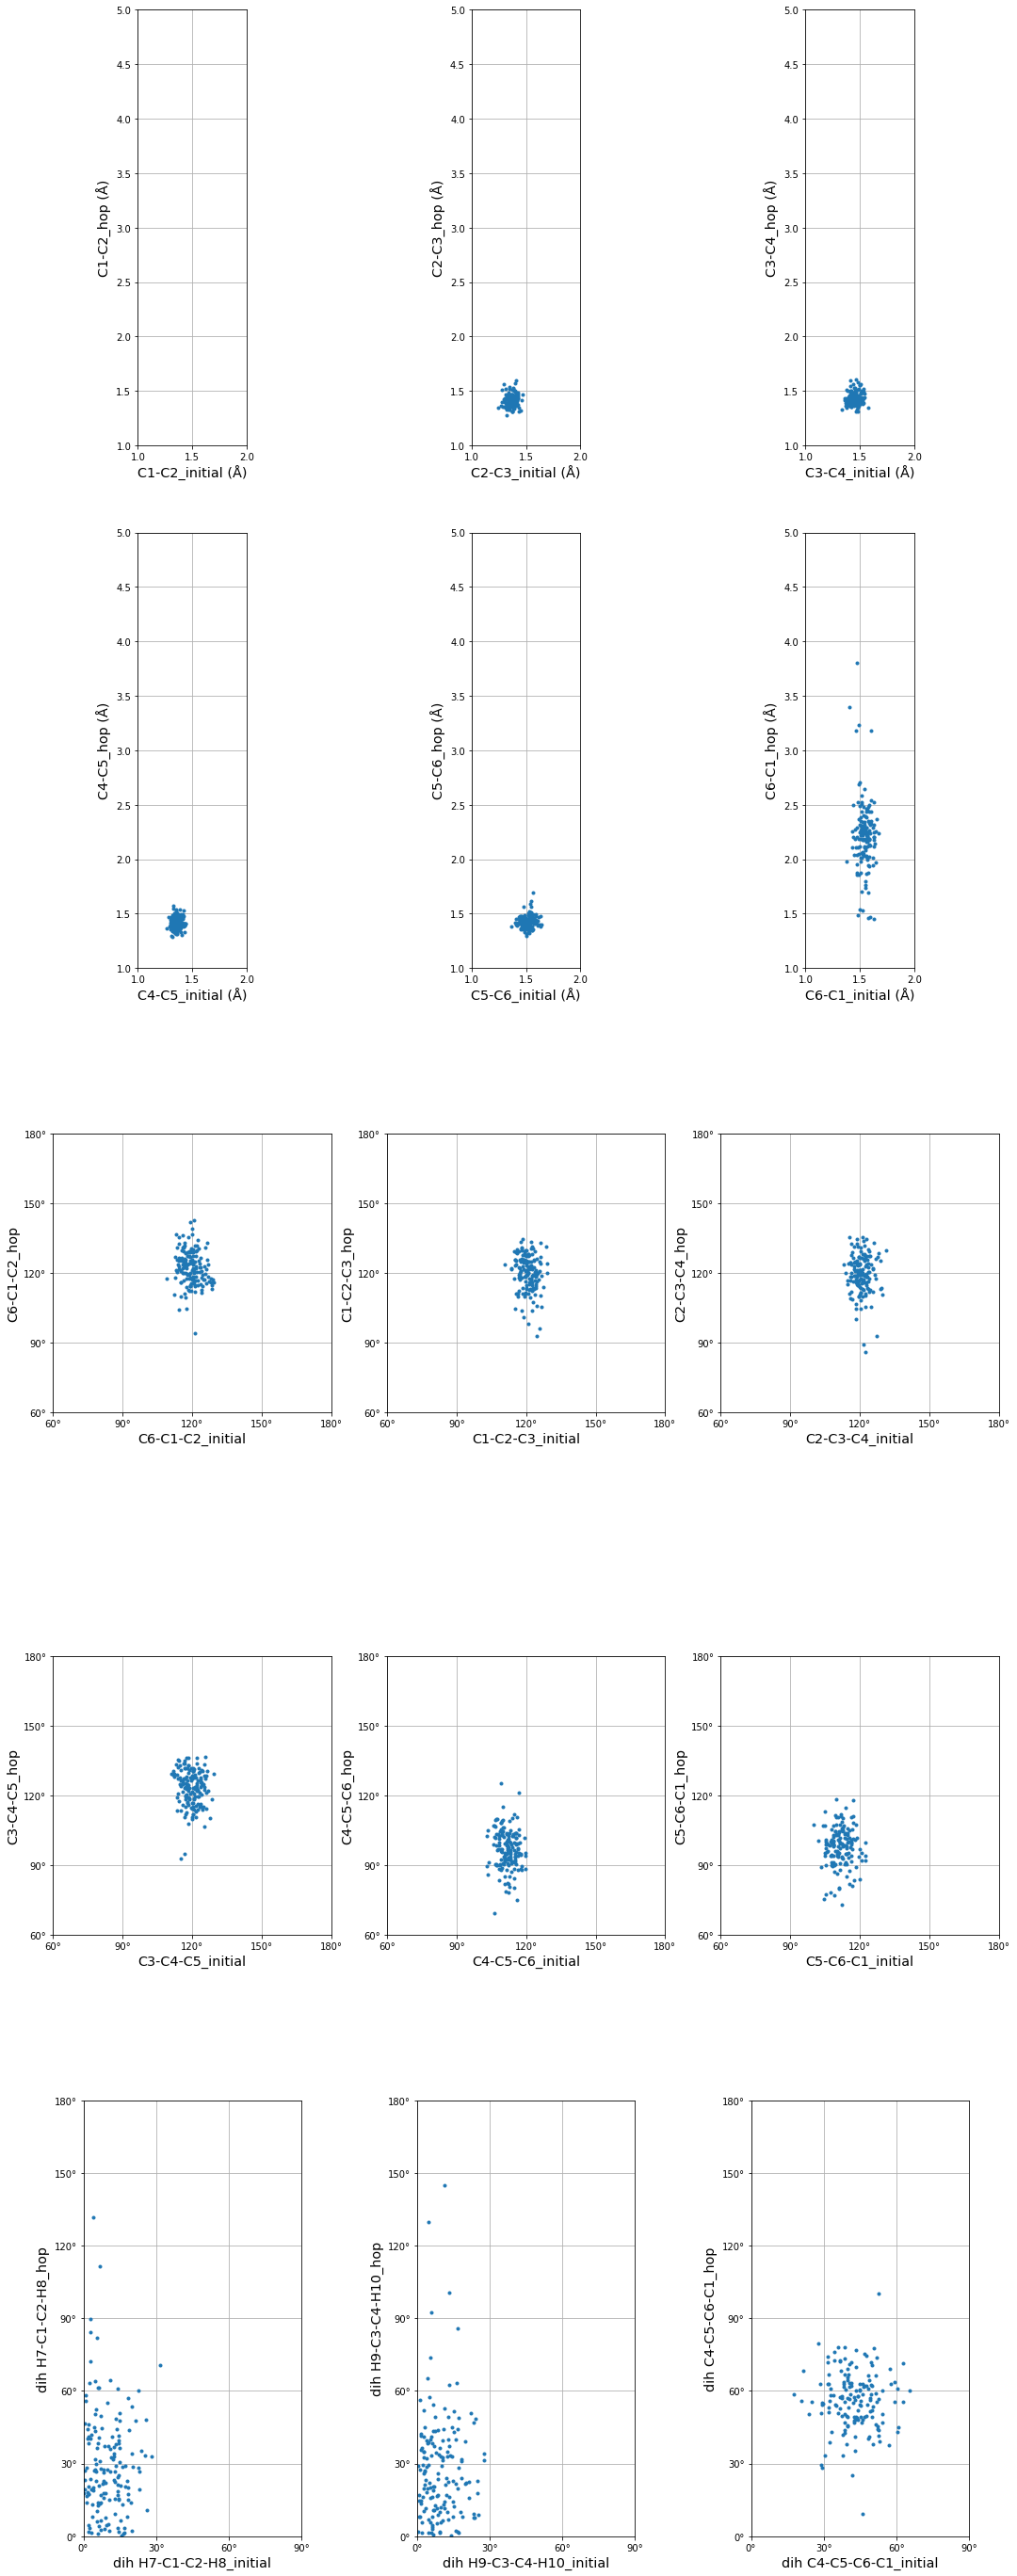

In [45]:
# ----------------------- Plot ----------------------- #
'''
1. dataframe indexes 
2. x_lim, y_lim
3. set aspect (height/width ticks ratio)
4. change "units" in x-y labels
5. Change MultipleLocator()
'''
# plt.subplot(121) nrows, ncols, and index
figure_nrows = math.ceil(len(compare_mean)/2)
figure_ncols = 3
plt.figure(figsize=(18,10*figure_nrows))

# -------------- C-C bonds range(1,8) --------------
C_C_stop=NUM_CARBON
for col, axe_index in zip(compare_mean['index'][0:C_C_stop], range(1,C_C_stop+1)):
    x=dih_merge[initial_col]
    y=dih_merge[hop_col]
    
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)    
    ax.set_aspect(1)
#     ax.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
#     xmin,xmax=ax.get_xlim()
#     ymin,ymax=ax.get_ylim()
#     ax.text(y.mean()*1.05, xmax*0.9,'mean_h: {:.1f}'.format(y.mean()))
#     ax.text(x.mean()*1.05, ymax*0.9,'mean_i: {:.1f}'.format(x.mean()))
        
    initial_col = col + "_initial"
    hop_col = col + "_hop"
    
    plt.plot(x,y, '.')
    plt.xlabel(initial_col+' (Å)', fontsize='x-large')
    plt.ylabel(hop_col+' (Å)', fontsize='x-large')
    plt.xlim(1,2)
    plt.ylim(1,5)
    plt.grid(True)
    axe_index+=1

# -------------- C-C-C angles range(20,28) --------------
for col, axe_index in zip(compare_mean['index'][C_C_stop:-3], range(C_C_stop+1,len(compare_mean)-2)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    formatter = EngFormatter(unit='°',places=0,sep="")
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    majorLocator = MultipleLocator(30)
    ax.xaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_locator(majorLocator)
    ax.set_aspect(1)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col, fontsize='x-large')
    plt.ylabel(hop_col, fontsize='x-large')
    plt.xlim(60,180)
    plt.ylim(60,180)
    plt.grid(True)
    axe_index+=1

# -------------- dihedrals rang(29,31) --------------
for col, axe_index in zip(compare_mean['index'][-3:], range(len(compare_mean)-2,len(compare_mean)+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    formatter = EngFormatter(unit='°',places=0,sep="")
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    majorLocator = MultipleLocator(30)
    ax.xaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_locator(majorLocator)
    ax.set_aspect(1)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col, fontsize='x-large')
    plt.ylabel(hop_col, fontsize='x-large')
    plt.xlim(0,90)
    plt.ylim(0,180)
    plt.grid(True)
    axe_index+=1
    
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals", "CHD", "initial_vs_hop", date_computed + "_initial_vs_hop" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
plt.savefig(output_path)

In [9]:
dih_angle_df = dih_merge.iloc[:,-3:]
lower_bound = 0
upper_bound = 90
dih_angle_df_filtered_1 = dih_angle_df[(dih_angle_df['dih H7-C1-C2-H8_hop']>=lower_bound ) & (dih_angle_df['dih H7-C1-C2-H8_hop']<=upper_bound)]
H7_C1_C2_H8_hop = len(dih_angle_df_filtered_1)/len(dih_angle_df) * 100

dih_angle_df_filtered_2 = dih_angle_df[(dih_angle_df['dih H9-C3-C4-H10_hop']>=lower_bound ) & (dih_angle_df['dih H9-C3-C4-H10_hop']<=upper_bound)]
H9_C3_C4_H10_hop = len(dih_angle_df_filtered_2)/len(dih_angle_df) * 100

dih_angle_df_filtered_2 = dih_angle_df[(dih_angle_df['dih C4-C5-C6-C1_hop']>=lower_bound ) & (dih_angle_df['dih C4-C5-C6-C1_hop']<=upper_bound)]
C4_C5_C6_C1_hop = len(dih_angle_df_filtered_2)/len(dih_angle_df) * 100

data =  {'dih H7-C1-C2-H8_hop': H7_C1_C2_H8_hop, 'dih H9-C3-C4-H10_hop': H9_C3_C4_H10_hop, 'dih C4-C5-C6-C1_hop': C4_C5_C6_C1_hop}
pd.DataFrame.from_dict(data, orient='index',)

,0
dih H7-C1-C2-H8_hop,98.726115
dih H9-C3-C4-H10_hop,97.452229
dih C4-C5-C6-C1_hop,99.363057


In [ ]:
# Pick tutorial 

In [ ]:
# Set ratio for x & y axis -- https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.axes.Axes.set_aspect.html#matplotlib.axes.Axes.set_aspect
# Set units 
# -- https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/engineering_formatter.html#sphx-glr-gallery-text-labels-and-annotations-engineering-formatter-py
# -- https://matplotlib.org/3.1.1/api/ticker_api.html#matplotlib.ticker.EngFormatter
# Spacing for grid ticks -- https://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot

In [38]:
# Capture output as image
# https://github.com/fomightez/dataframe2img/blob/master/index.ipynb
# https://hub.gke.mybinder.org/user/fomightez-dataframe2img-bqozwg0p/notebooks/index.ipynb    